In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic')

In [ ]:
!pip install kmodes

In [ ]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

<h3>1. K-modes 클러스터링</h3>
<h4>1) 엘보우 메서드를 사용한 클러스터 수 결정</h4>

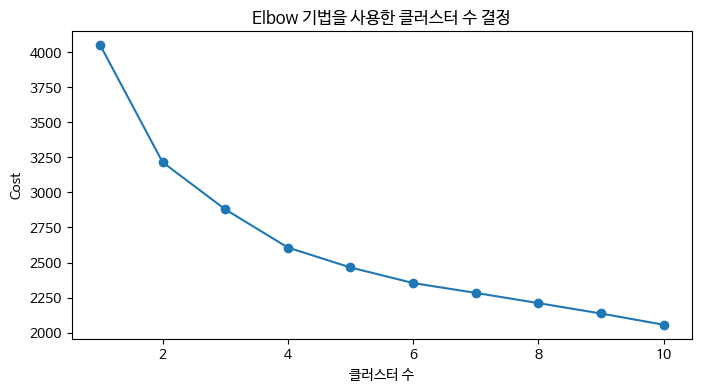

In [ ]:
# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/EDA project - 여행하소서/제출 파일/230821~230925.csv', index_col=0)
data = data.drop(columns=['응답자ID', '조사시작일자'])

# 범주형 열 선택
categorical_columns = [
    '성별구분코드',
    '연령대구분명',
    '답변자거주지역명',
    '가구소득정도명',
]

data_categorical = data[categorical_columns]

# K-Modes 클러스터링을 위한 클러스터 수 범위 설정
cluster_range = range(1, 11)
costs = []

for num_clusters in cluster_range:
    km = KModes(n_clusters=num_clusters, init='Cao', n_init=1, verbose=0, random_state=0)
    cluster_labels = km.fit_predict(data_categorical)
    costs.append(km.cost_)

# Elbow 그래프를 통해 적절한 클러스터 수 결정
plt.figure(figsize=(8, 4))
plt.plot(cluster_range, costs, marker='o', linestyle='-')
plt.xlabel('클러스터 수')
plt.ylabel('Cost')
plt.title('Elbow 기법을 사용한 클러스터 수 결정')
plt.show()

<h4>2) 결정한 클러스터 수(5개)로 클러스터링 수행</h4>


In [ ]:
# 적절한 클러스터 수를 선택하고 K-Modes 클러스터링을 수행
selected_num_clusters = 5  # 적절한 클러스터 수를 선택
km = KModes(n_clusters=selected_num_clusters, init='Cao', n_init=1, verbose=1, random_state=0)
cluster_labels = km.fit_predict(data_categorical)

# 클러스터 레이블을 원본 데이터프레임에 추가
data['군집'] = cluster_labels

# 결과 확인
print(data['군집'].value_counts())

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2465.0
0    563
1    381
2    249
3    202
4    100
Name: 군집, dtype: int64


In [ ]:
data.head()

,성별구분코드,연령대구분명,답변자거주지역명,가구소득정도명,중국여행관심값,일본여행관심값,홍콩마카오여행관심값,동남아시아여행관심값,중동서남아시아여행관심값,미국캐나다여행관심값,남미중남미여행관심값,서유럽북유럽여행관심값,동유럽여행관심값,남유럽여행관심값,남태평양여행관심값,아프리카여행관심값,군집
0,F,60,서울특별시,2.0,3,3,1,1,3,4,3,4,1,2,5,1,3
1,F,60,서울특별시,3.0,2,3,3,3,3,4,3,4,3,3,4,2,1
2,F,60,서울특별시,2.0,1,2,3,3,3,3,3,3,3,3,3,3,3
3,F,60,서울특별시,2.0,2,2,3,4,2,3,4,3,4,4,4,3,3
4,F,60,서울특별시,2.0,3,3,3,4,4,4,4,4,3,4,3,3,3


In [ ]:
data.to_csv('clusterd.csv')

<h4>3) 군집별 관심도 분포 시각화</h4>

In [ ]:
unique_clusters = data['군집'].unique()
unique_clusters

array([3, 1, 0, 4, 2], dtype=uint16)

In [ ]:
# 열 지정
columns_to_plot = [
    '중국여행관심값',	'일본여행관심값',
    '홍콩마카오여행관심값',	'동남아시아여행관심값',
    '중동서남아시아여행관심값',	'미국캐나다여행관심값',
    '남미중남미여행관심값',	'서유럽북유럽여행관심값',
    '동유럽여행관심값', '남유럽여행관심값',
    '남태평양여행관심값',	'아프리카여행관심값'
]

['남태평양여행관심값', '남유럽여행관심값', '서유럽북유럽여행관심값']


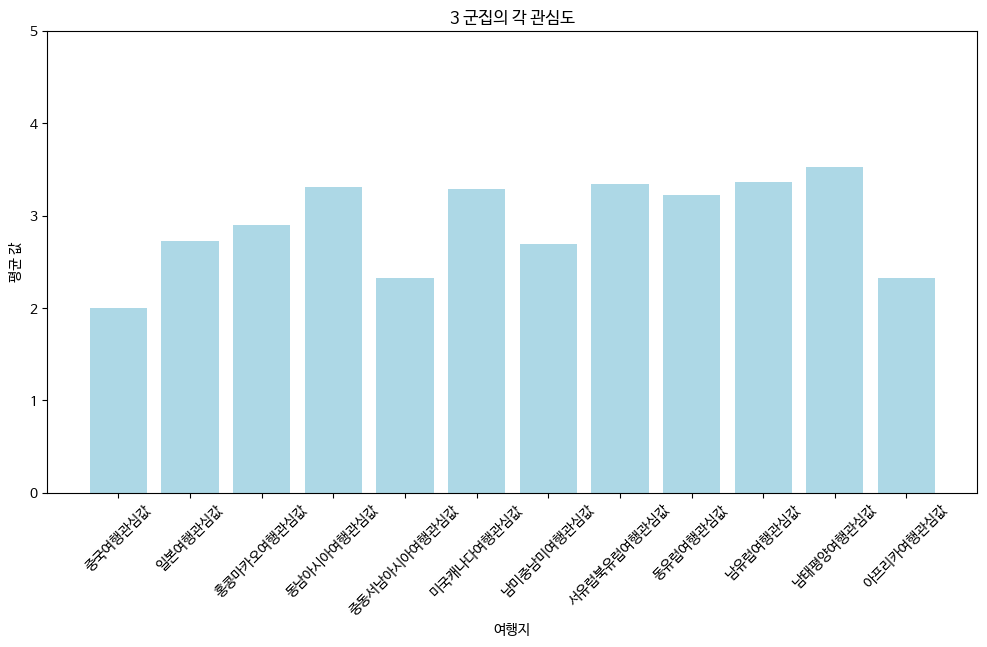

['서유럽북유럽여행관심값', '남태평양여행관심값', '미국캐나다여행관심값']


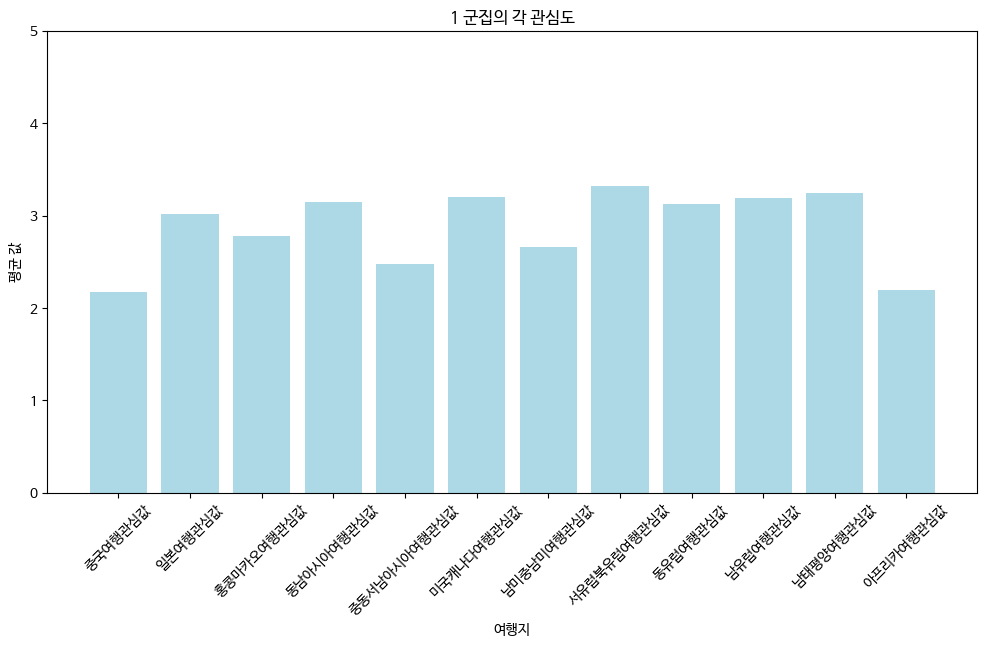

['남태평양여행관심값', '서유럽북유럽여행관심값', '남유럽여행관심값']


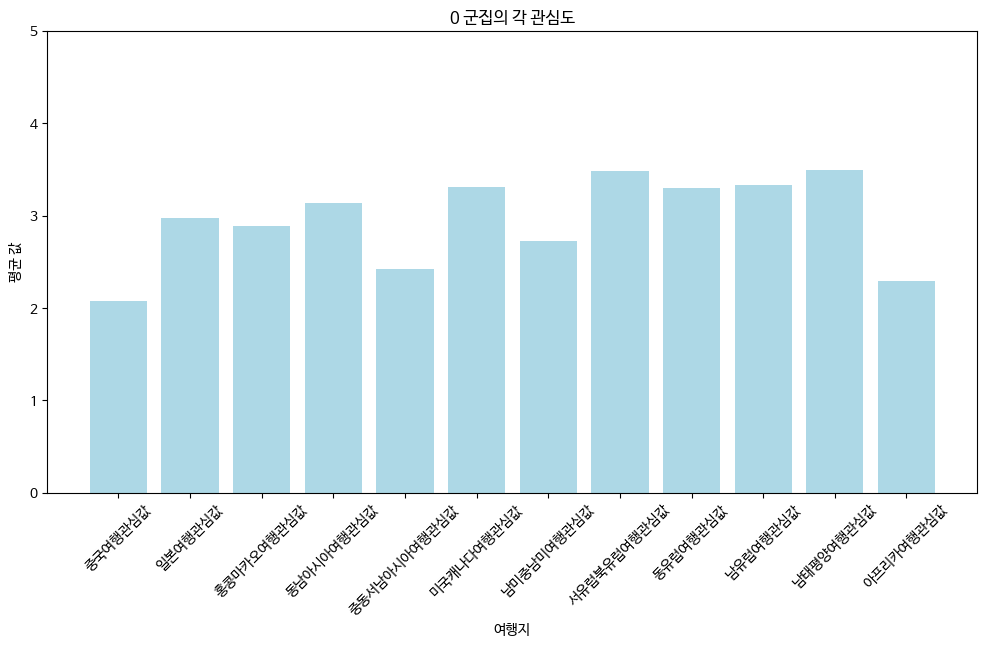

['서유럽북유럽여행관심값', '남태평양여행관심값', '남유럽여행관심값']


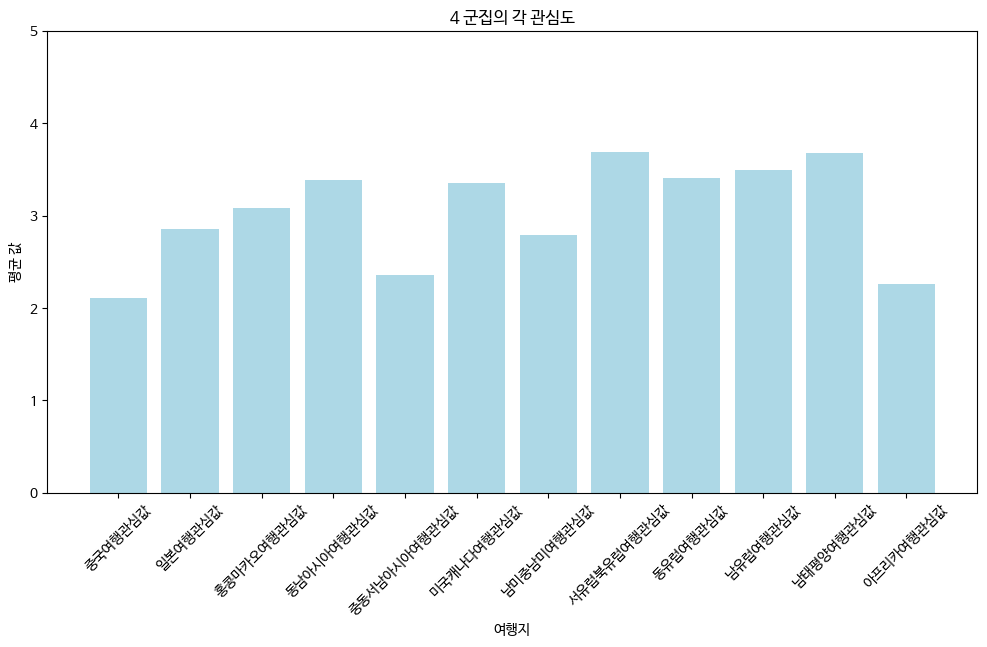

['미국캐나다여행관심값', '서유럽북유럽여행관심값', '남태평양여행관심값']


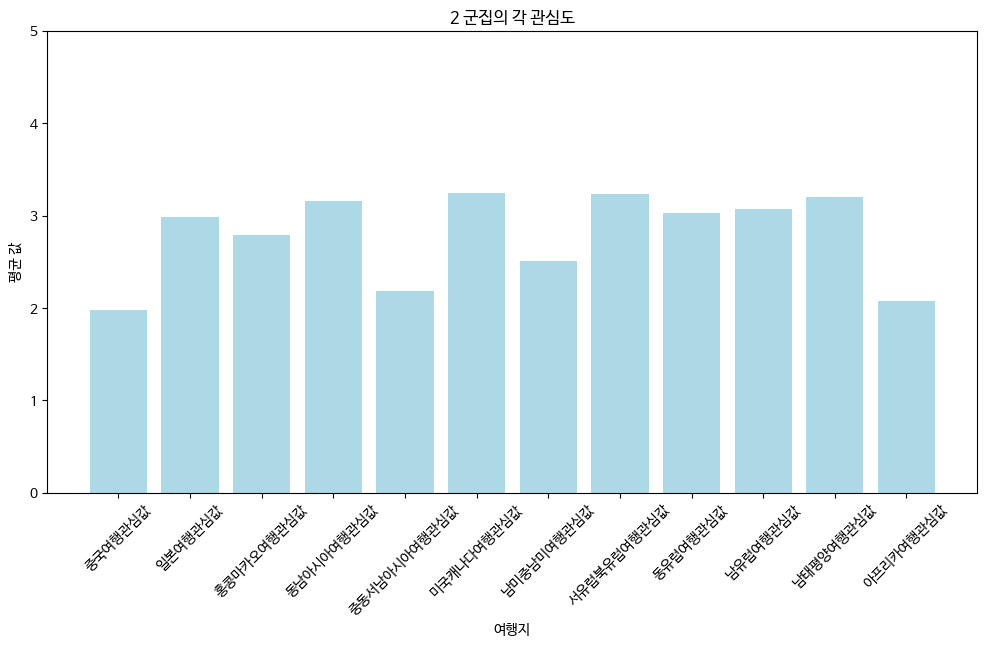

In [ ]:
for cluster in unique_clusters:
    cluster_data = data[data['군집'] == cluster]

    values = cluster_data[columns_to_plot].mean()

    plt.figure(figsize=(12, 6))

    # 값들을 내림차순으로 정렬한 후 상위 3개 열 인덱스 찾기
    top_column_indices = values.argsort()[::-1][:3]


    # 상위 3개 열만 선택
    top_columns = [columns_to_plot[i] for i in top_column_indices]
    print(top_columns)

    plt.bar(columns_to_plot, values, color='lightblue')
    plt.xlabel('여행지')
    plt.ylabel('평균 값')
    plt.title(f'{cluster} 군집의 각 관심도')

    # Y 레이블 범위 설정
    plt.ylim(0, 5)

    plt.xticks(rotation=45)
    plt.show()